In [70]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps
from mpl_toolkits.mplot3d import Axes3D
import scipy
%matplotlib inline

Возьмем значения $a$ = [2,7,5] 

$m = 200$

$sigma = 0.2$ 


In [170]:
m = 200 
T = np.arange(0,(m-1)*10/m+1e-2,10/m)
a_true = np.array([2,5,10])
print('len T = ' + str(len(T)))

len T = 200


In [151]:
def y_at(a,t):
    return a[2]*np.sin(T) + a[1]*T + a[0]

In [128]:
def build(a,sigma):
    y_true = y_at(a,T)
    y_obs = y_true + sps.norm.rvs(size=len(y_true),loc=0,scale=sigma)
    delta_i = y_obs - y_true
    return y_true,y_obs,delta_i


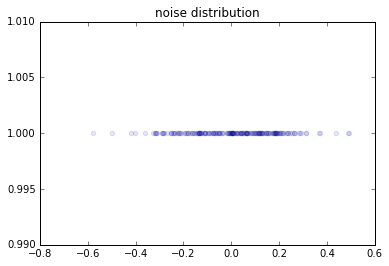

In [171]:
sigma = 0.2
y_true,y_obs,delta_i = build(a_true,sigma)
plt.title('noise distribution')
plt.scatter(delta_i, np.ones(len(y_true)) ,  alpha=0.1)

### 1) МНК
$y = a_2 \sin(t) + a_1 t + a_0$, нужно найти $a$, минимизировав $\left|Ax - y \right|_2$
$$a = [a_0,a_1,a_2], \quad y = [y^{true}_1,y^{true}_2,\dots,y^{true}_m], \quad A = \left( \begin{matrix} 1 & t_1 & sin t_1 \\ 1 & t_2 & sin t_2\\ \dots \\ 1 & t_m & sin t_m \end{matrix}\right)$$

Решением будет являться $a = Zb$ , где $Z = (A^T A)^{-1}A^T$

In [124]:
def min_in_L2(y,T) :
    A = np.matrix([[1,t,np.sin(t)] for t in T])
    a = (A.T*A).I * A.T * np.matrix(y).T
    return np.array(a.T)[0]

### 2) Сумма абсолютных значений невязок
Нужно решить задачу:
$\sum_m \left|a_0 + a_1 t_i + a_2 \sin t_i - y^{true}_i\right| \to \min$

Это эквивалентно задаче:

$$\sum^m_{i=1} x_i \to min $$
$$ Aa - y \leq x  \iff Aa - x \leq y $$
$$ Aa - y \geq -x \iff -Aa - x \leq -y $$


In [122]:
def min_in_L1(y,T):
        A = np.matrix([[1,t,np.sin(t)] for t in T])
        c = np.concatenate([np.zeros(3),np.ones(m)])
        E = np.identity(m)
        A_ub = np.concatenate([np.concatenate([A, -A], axis=0),
                               np.concatenate([-E, -E], axis=0)],axis=1)
        b_ub = np.matrix(np.concatenate([y, -y]))
        result = scipy.optimize.linprog(c=c, A_ub=A_ub, b_ub=b_ub, 
                                       bounds = [(-np.inf, np.inf) for i in range(A_ub.shape[1])],
                                       options=dict(bland=True, tol=1e-8, maxiter=10 ** 6))
        return result.x[0:3]

### 3)  Максимальное абсолютное значение невязки 
$\max_{i \in [1\dots m]}\left|a_0 + a_1 t_i + a_2 \sin t_i - y^{true}_i\right| \to \min$, что эквивалентно:
$$ x \to \min $$
$$ Aa - y \leq x  \iff Aa - x \leq y $$
$$ Aa - y \geq -x \iff -Aa - x \leq -y $$

In [130]:
def min_in_L_inf(y,T):
    A = np.matrix([[1,t,np.sin(t)] for t in T])
    c = np.concatenate([np.zeros(3),np.ones(1)])
    E = np.matrix(np.ones(m)).T
    A_ub = np.concatenate([np.concatenate([A, -A], axis=0),
                            np.concatenate((-E, -E), axis=0)],axis=1)
    b_ub = np.matrix(np.concatenate([y, -y]))
    result = scipy.optimize.linprog(c=c, A_ub=A_ub, b_ub=b_ub, 
                               bounds = [(-np.inf, np.inf) for i in range(A_ub.shape[1])],
                               options=dict(bland=True, tol=1e-8, maxiter=10 ** 6))
    return result.x[0:3]

In [172]:
a_l2 = min_in_L2(y_obs,T)
a_l1 = min_in_L1(y_obs,T)
a_l_inf = min_in_L_inf(y_obs,T)

In [173]:
print(a_l2)
print(a_l1)
print(a_l_inf)

[ 1.93717161  5.01320851  9.99623577]
[ 1.92778917  5.01545517  9.99569474]
[  1.88101785   5.02507739  10.06745839]


In [174]:
y_l2 = y_at(a_l2,T)
y_l1 = y_at(a_l1,T)
y_l_inf = y_at(a_l_inf,T)

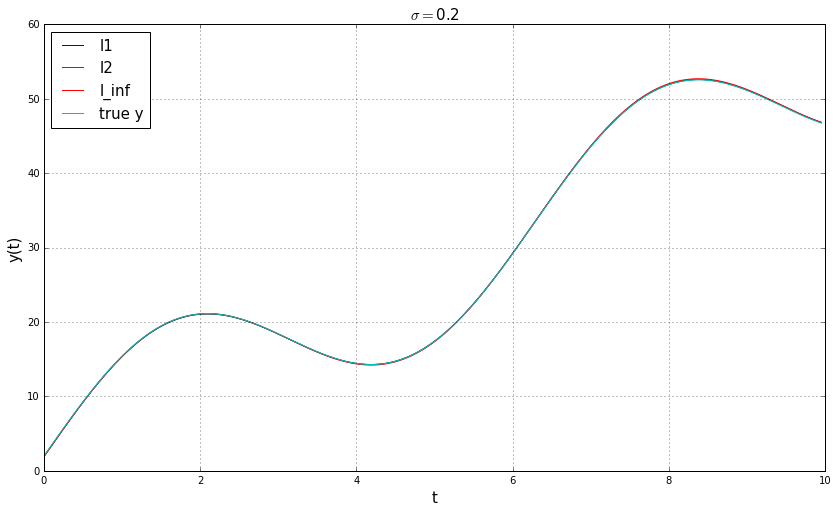

In [191]:
plt.figure(figsize=(14,8))
plt.grid(True)
plt.title(r'$\sigma = $' + str(sigma),fontsize=15)
plt.plot(T,y_l1,label='l1')
plt.plot(T,y_l2,label='l2')
plt.plot(T,y_l_inf,label='l_inf')
plt.plot(T,y_true,label='true y')
plt.xlabel('t',fontsize=15)
plt.ylabel('y(t)',fontsize=15)
plt.legend(loc='best',fontsize=15)
plt.show()

[]

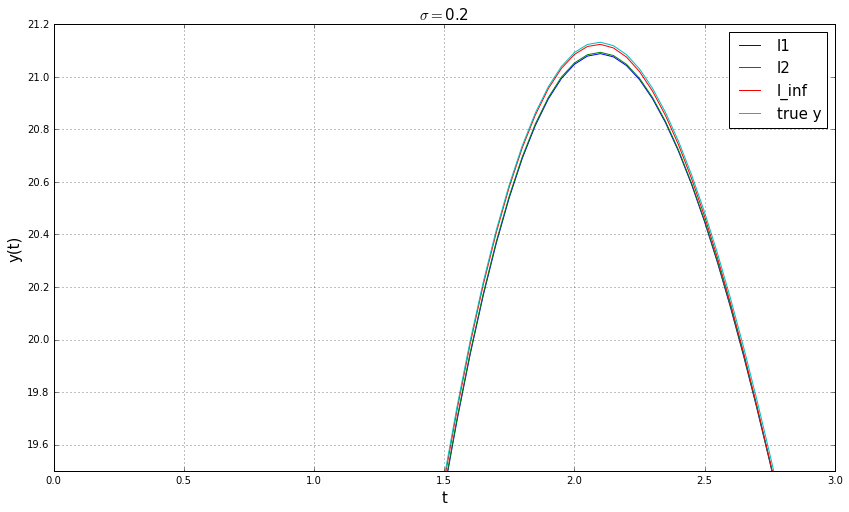

In [192]:
plt.figure(figsize=(14,8))
plt.grid(True)
plt.title(r'$\sigma = $' + str(sigma),fontsize=15)
plt.plot(T,y_l1,label='l1')
plt.plot(T,y_l2,label='l2')
plt.plot(T,y_l_inf,label='l_inf')
plt.plot(T,y_true,label='true y')
plt.xlabel('t',fontsize=15)
plt.ylabel('y(t)',fontsize=15)
plt.legend(loc='best',fontsize=15)
plt.xlim([0,3])
plt.ylim([19.5,21.2])
plt.plot()

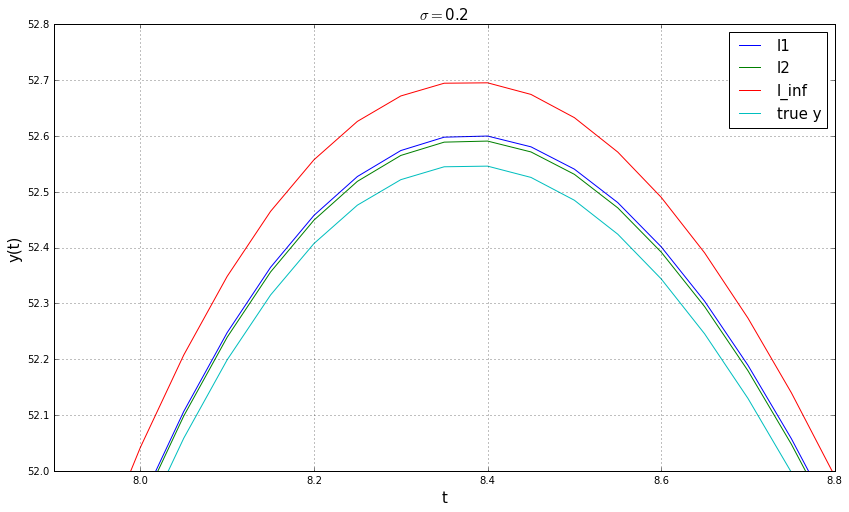

In [193]:
plt.figure(figsize=(14,8))
plt.grid(True)
plt.title(r'$\sigma = $' + str(sigma),fontsize=15)
plt.plot(T,y_l1,label='l1')
plt.plot(T,y_l2,label='l2')
plt.plot(T,y_l_inf,label='l_inf')
plt.plot(T,y_true,label='true y')
plt.xlabel('t',fontsize=15)
plt.ylabel('y(t)',fontsize=15)
plt.legend(loc='best',fontsize=15)
plt.xlim([7.9,8.8])
plt.ylim([52,52.8])
plt.show()

Попробуем другое $\sigma = 2$

In [197]:
sigma = 2
y_true,y_obs,delta_i = build(a_true,sigma)

In [198]:
a_l2 = min_in_L2(y_obs,T)
a_l1 = min_in_L1(y_obs,T)
a_l_inf = min_in_L_inf(y_obs,T)
print(a_l2)
print(a_l1)
print(a_l_inf)
y_l2 = y_at(a_l2,T)
y_l1 = y_at(a_l1,T)
y_l_inf = y_at(a_l_inf,T)

[  2.41217459   4.87232398  10.27157735]
[  2.37703598   4.87294244  10.28618471]
[  4.30362551   4.44510913  10.44736933]


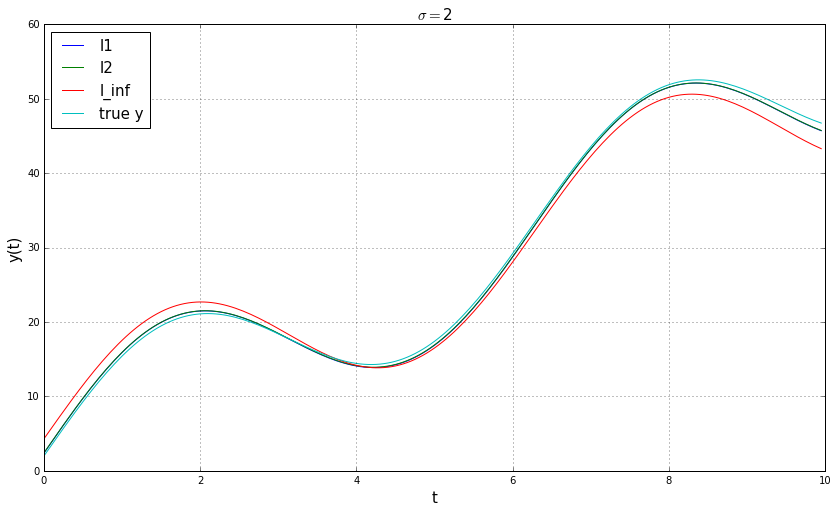

In [199]:
plt.figure(figsize=(14,8))
plt.grid(True)
plt.title(r'$\sigma = $' + str(sigma),fontsize=15)
plt.plot(T,y_l1,label='l1')
plt.plot(T,y_l2,label='l2')
plt.plot(T,y_l_inf,label='l_inf')
plt.plot(T,y_true,label='true y')
plt.xlabel('t',fontsize=15)
plt.ylabel('y(t)',fontsize=15)
plt.legend(loc='best',fontsize=15)
plt.show()

In [200]:
sigma = 10
y_true,y_obs,delta_i = build(a_true,sigma)
a_l2 = min_in_L2(y_obs,T)
a_l1 = min_in_L1(y_obs,T)
a_l_inf = min_in_L_inf(y_obs,T)
print(a_l2)
print(a_l1)
print(a_l_inf)
y_l2 = y_at(a_l2,T)
y_l1 = y_at(a_l1,T)
y_l_inf = y_at(a_l_inf,T)

[ 3.78498912  4.73494071  9.69595981]
[  4.80540794   4.59556082  11.26004651]
[ 5.05887492  4.91223809  4.48364853]


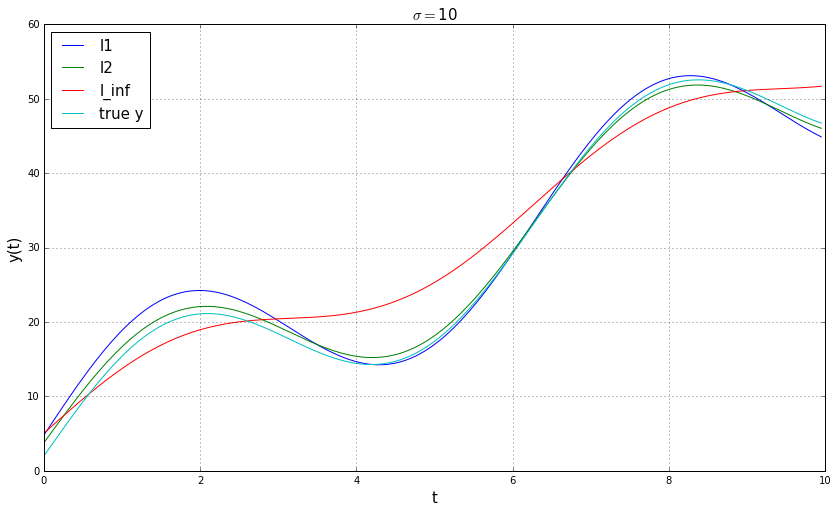

In [201]:
plt.figure(figsize=(14,8))
plt.grid(True)
plt.title(r'$\sigma = $' + str(sigma),fontsize=15)
plt.plot(T,y_l1,label='l1')
plt.plot(T,y_l2,label='l2')
plt.plot(T,y_l_inf,label='l_inf')
plt.plot(T,y_true,label='true y')
plt.xlabel('t',fontsize=15)
plt.ylabel('y(t)',fontsize=15)
plt.legend(loc='best',fontsize=15)
plt.show()

[ 10.43461275   4.13068027  -2.13060314]
[ 2.20310651  4.75356582 -4.44297582]
[ 51.47735472  -4.56542066  10.77206217]


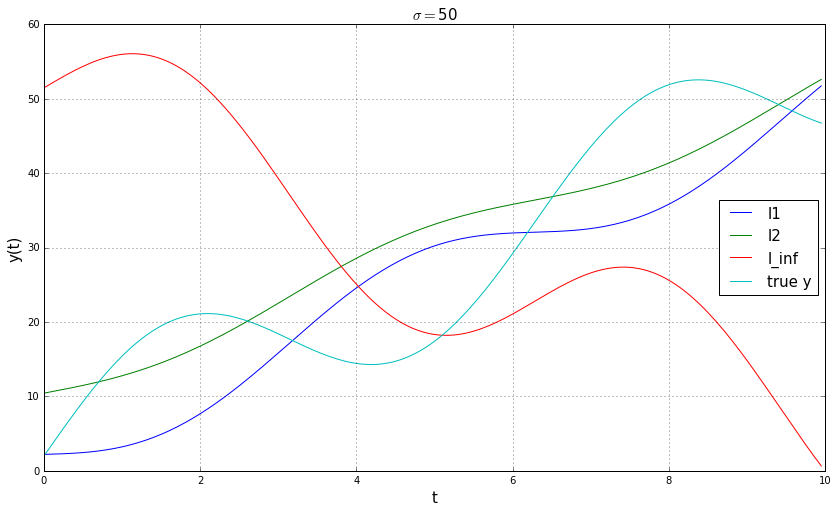

In [202]:
sigma = 50
y_true,y_obs,delta_i = build(a_true,sigma)
a_l2 = min_in_L2(y_obs,T)
a_l1 = min_in_L1(y_obs,T)
a_l_inf = min_in_L_inf(y_obs,T)
print(a_l2)
print(a_l1)
print(a_l_inf)
y_l2 = y_at(a_l2,T)
y_l1 = y_at(a_l1,T)
y_l_inf = y_at(a_l_inf,T)
plt.figure(figsize=(14,8))
plt.grid(True)
plt.title(r'$\sigma = $' + str(sigma),fontsize=15)
plt.plot(T,y_l1,label='l1')
plt.plot(T,y_l2,label='l2')
plt.plot(T,y_l_inf,label='l_inf')
plt.plot(T,y_true,label='true y')
plt.xlabel('t',fontsize=15)
plt.ylabel('y(t)',fontsize=15)
plt.legend(loc='best',fontsize=15)
plt.show()

При больших $\sigma$, оценки получаются менее точными, но $L_1$ и $L_2$ примерно одинаковы и приближают реальные значения лучше, чем $L_{\inf}$

Проверим на устойчивость к выбросам

In [217]:
sigma = 1
y_true,y_obs,delta_i = build(a_true,sigma)

#Изменим 1 и m-1 -ые значения на +- 50
y_true[0] = y_true[0] - 50
y_true[-1] = y_true[-1] + 50

a_l2 = min_in_L2(y_obs,T)
a_l1 = min_in_L1(y_obs,T)
a_l_inf = min_in_L_inf(y_obs,T)
print(a_true)
print(a_l2)
print(a_l1)
print(a_l_inf)
y_l2 = y_at(a_l2,T)
y_l1 = y_at(a_l1,T)
y_l_inf = y_at(a_l_inf,T)

[ 2  5 10]
[  1.95886321   5.00196839  10.18856939]
[  2.00134128   4.99070919  10.12461674]
[  1.49201395   5.00175443  10.76691246]


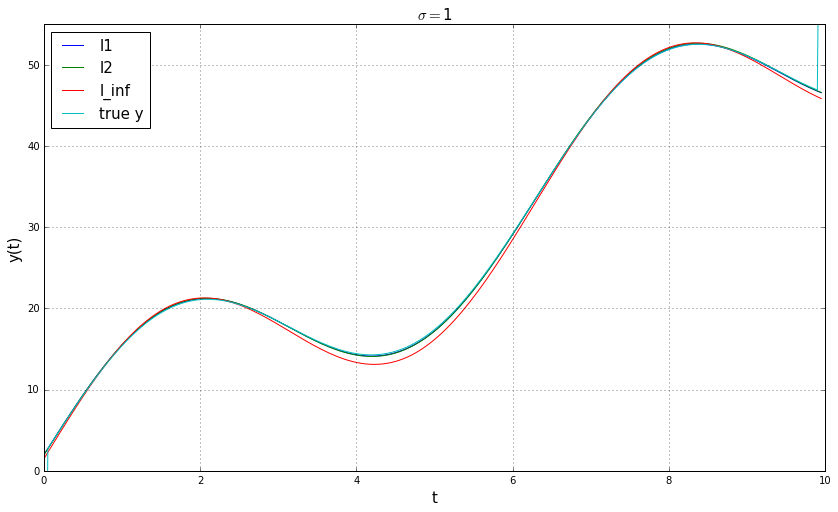

In [218]:
plt.figure(figsize=(14,8))
plt.grid(True)
plt.title(r'$\sigma = $' + str(sigma),fontsize=15)
plt.plot(T,y_l1,label='l1')
plt.plot(T,y_l2,label='l2')
plt.plot(T,y_l_inf,label='l_inf')
plt.plot(T,y_true,label='true y')
plt.xlabel('t',fontsize=15)
plt.ylabel('y(t)',fontsize=15)
plt.legend(loc='best',fontsize=15)
plt.ylim([0,55])
plt.show()

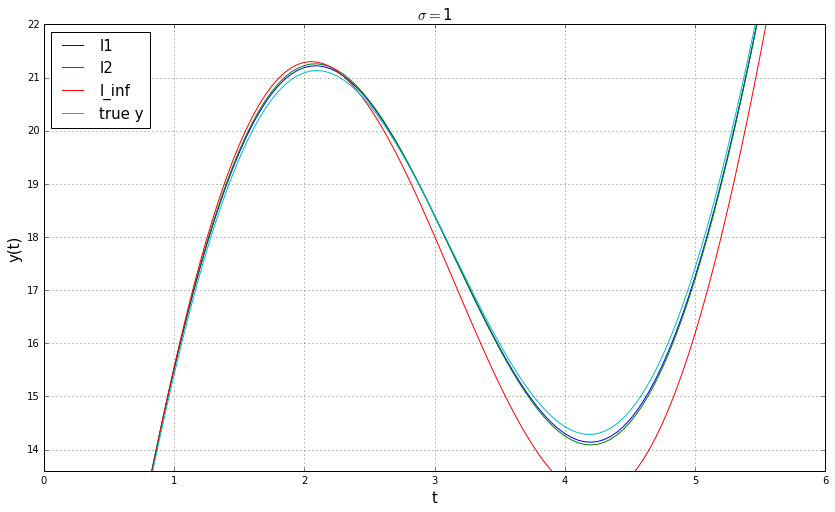

In [219]:
plt.figure(figsize=(14,8))
plt.grid(True)
plt.title(r'$\sigma = $' + str(sigma),fontsize=15)
plt.plot(T,y_l1,label='l1')
plt.plot(T,y_l2,label='l2')
plt.plot(T,y_l_inf,label='l_inf')
plt.plot(T,y_true,label='true y')
plt.xlabel('t',fontsize=15)
plt.ylabel('y(t)',fontsize=15)
plt.legend(loc='best',fontsize=15)
plt.xlim([0,6])
plt.ylim([13.6,22])
plt.show()

In [220]:
sigma = 0.1
y_true,y_obs,delta_i = build(a_true,sigma)

#Изменим 1 и m-1 -ые значения на +- 50
y_true[0] = y_true[0] - 50
y_true[-1] = y_true[-1] + 50

a_l2 = min_in_L2(y_obs,T)
a_l1 = min_in_L1(y_obs,T)
a_l_inf = min_in_L_inf(y_obs,T)
print(a_true)
print(a_l2)
print(a_l1)
print(a_l_inf)
y_l2 = y_at(a_l2,T)
y_l1 = y_at(a_l1,T)
y_l_inf = y_at(a_l_inf,T)

[ 2  5 10]
[  1.96907775   5.00396706  10.03527348]
[  1.96093841   5.00625444  10.02913675]
[  2.02807113   4.99076224  10.09185313]


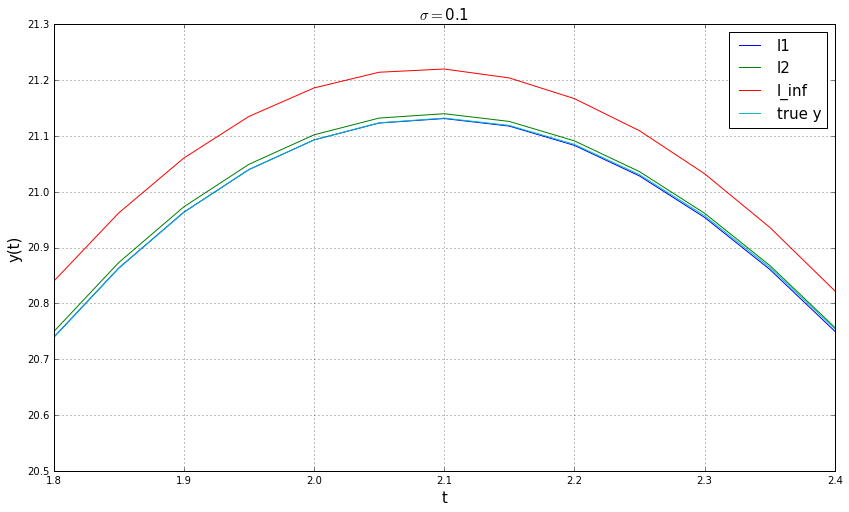

In [227]:
plt.figure(figsize=(14,8))
plt.grid(True)
plt.title(r'$\sigma = $' + str(sigma),fontsize=15)
plt.plot(T,y_l1,label='l1')
plt.plot(T,y_l2,label='l2')
plt.plot(T,y_l_inf,label='l_inf')
plt.plot(T,y_true,label='true y')
plt.xlabel('t',fontsize=15)
plt.ylabel('y(t)',fontsize=15)
plt.legend(loc='best',fontsize=15)
plt.xlim([1.8,2.4])
plt.ylim([20.5,21.3])
plt.show()

$L_1$ и $L_2$ гораздо менее чувствительны к выбросам, чем $L_{\inf}$, при этом $L_1$ менее чувствительна к выбросам, чем $L_2$, это заметно при малых $\sigma$, когда оценка достаточно точна.